   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 9.9 MB/s eta 0:00:00
Librerías importadas correctamente

DESCARGANDO DATOS HISTÓRICOS (2 AÑOS)
✓ AAPL: 502 registros descargados
✓ MSFT: 502 registros descargados
✓ GOOGL: 502 registros descargados
✓ AMZN: 502 registros descargados
✓ TSLA: 502 registros descargados
✓ SPY: 502 registros descargados
✓ QQQ: 502 registros descargados
✓ IWM: 502 registros descargados
✓ EFA: 502 registros descargados
✓ AGG: 502 registros descargados

CALCULANDO RETORNOS

Retornos calculados: 501 días de trading
Periodo: 2023-10-26 a 2025-10-24

ESTADÍSTICAS DESCRIPTIVAS
       Media Diaria (%)  Mediana (%)  Desv. Estándar (%)  \
AAPL              0.088        0.150               1.758   
MSFT              0.089        0.127               1.388   
GOOGL             0.147        0.303               1.852   
AMZN              0.122        0.062               1.932   
TSLA              0.142        0.135               3.944   
SPY               0.102    

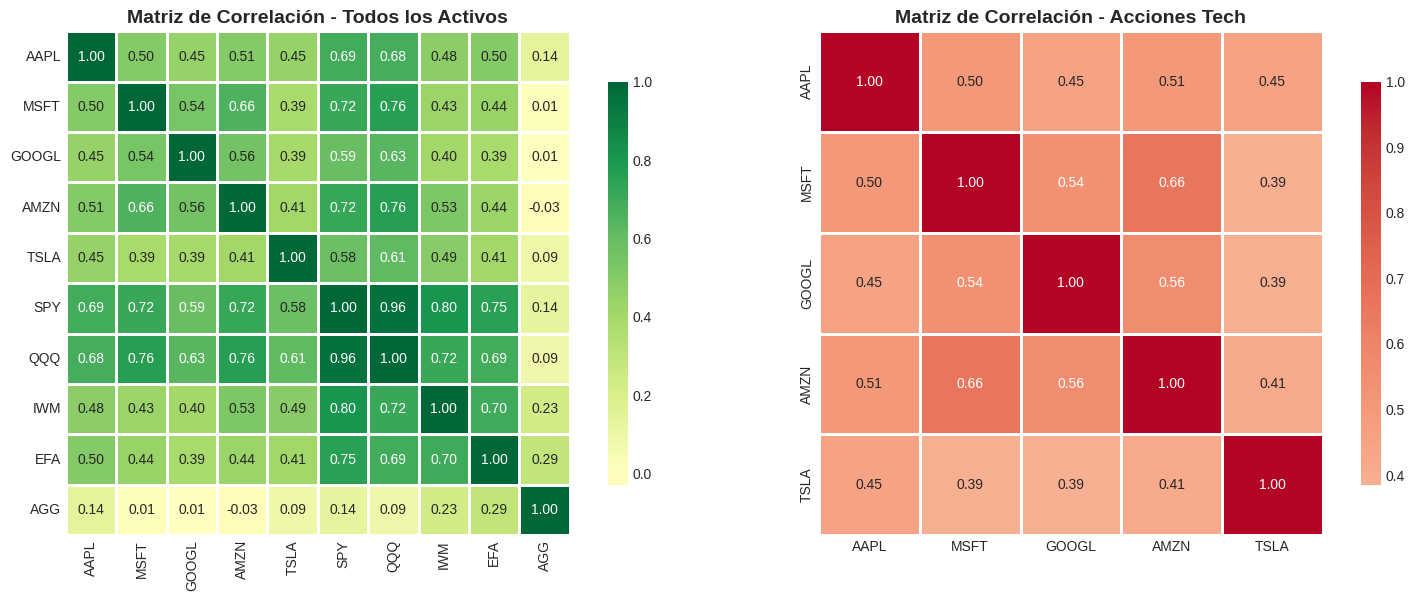


 PARES CON MAYOR CORRELACIÓN:
  SPY - QQQ: 0.959
  QQQ - SPY: 0.959
  SPY - IWM: 0.804
  IWM - SPY: 0.804
  MSFT - QQQ: 0.760

 PARES CON MENOR CORRELACIÓN:
  AMZN - AGG: -0.029
  AGG - AMZN: -0.029
  GOOGL - AGG: 0.011
  AGG - GOOGL: 0.011
  MSFT - AGG: 0.014

ANÁLISIS DE HECHOS ESTILIZADOS


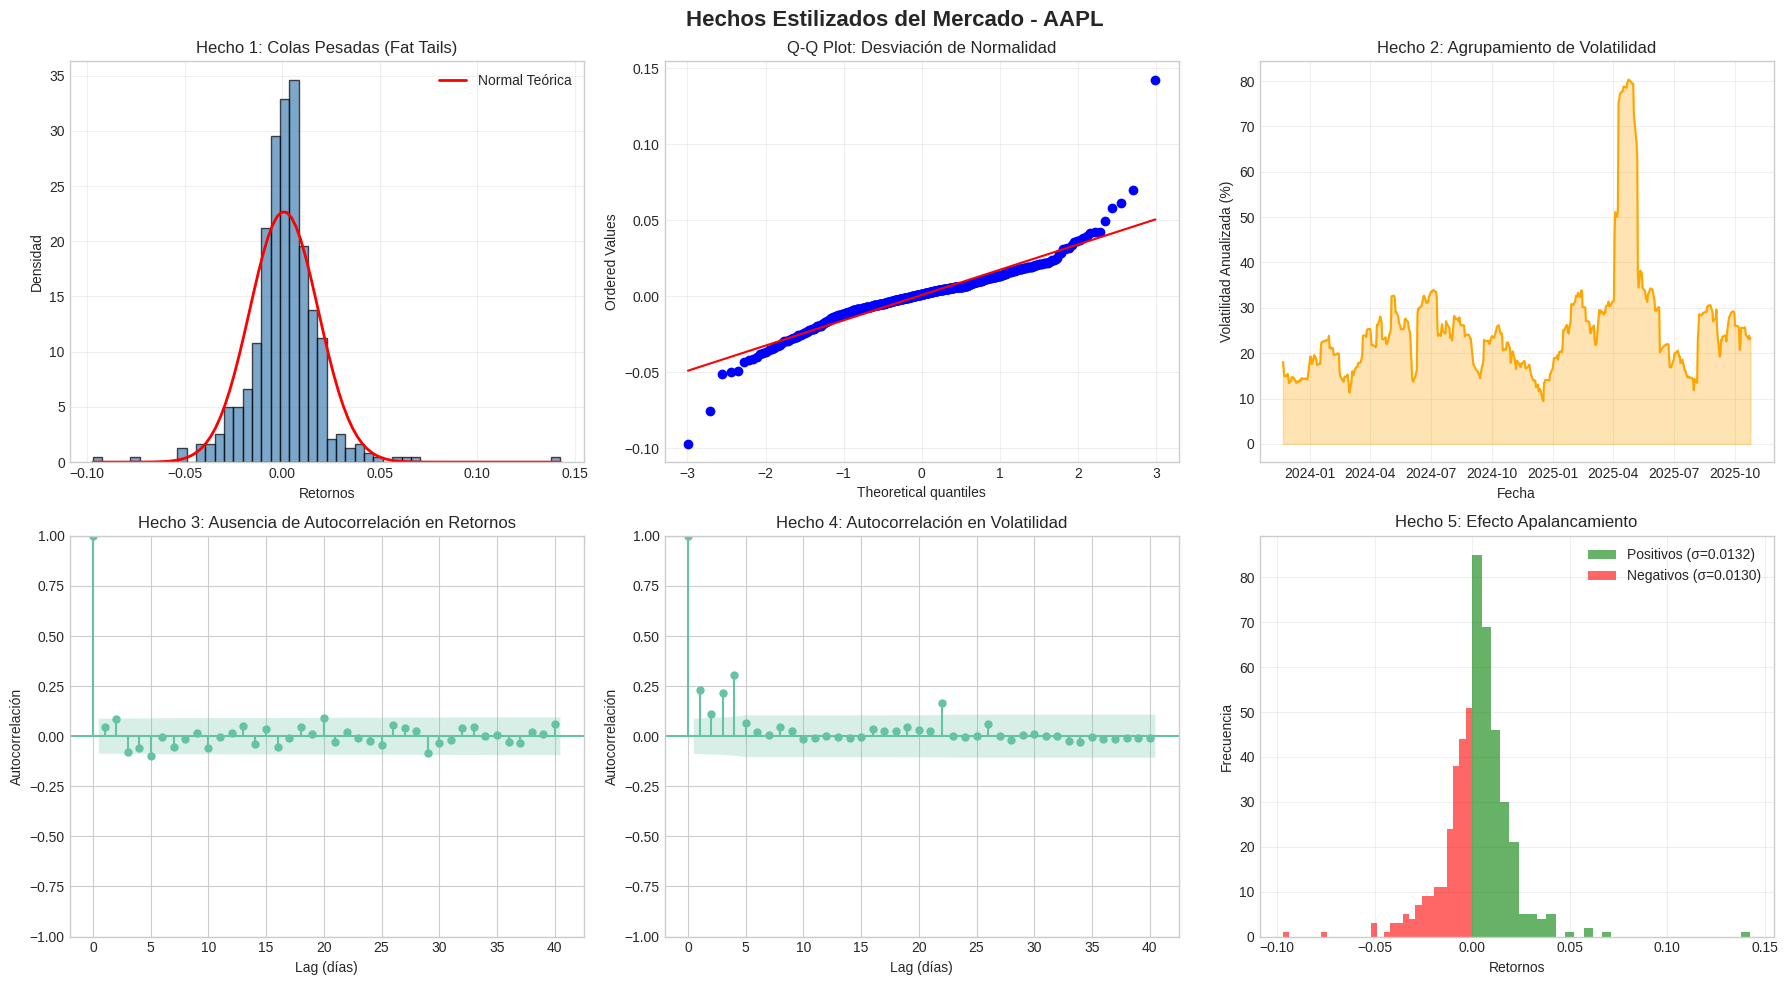


 Test de Jarque-Bera para AAPL:
  Estadístico: 2648.90
  P-valor: 0.000000
  Conclusión: Rechazamos normalidad (α=0.05)

ANÁLISIS DE DESEMPEÑO
        Retorno Acumulado (%)  Retorno Anualizado (%)  Volatilidad Anual (%)  \
Activo                                                                         
AAPL                    43.62                   19.97                  27.91   
MSFT                    48.68                   22.08                  22.03   
GOOGL                   91.18                   38.54                  29.39   
AMZN                    68.20                   29.89                  30.66   
TSLA                    38.64                   17.86                  62.60   
SPY                     62.07                   27.49                  16.24   
QQQ                     70.92                   30.95                  20.63   
IWM                     48.42                   21.97                  22.29   
EFA                     48.48                   22.00   

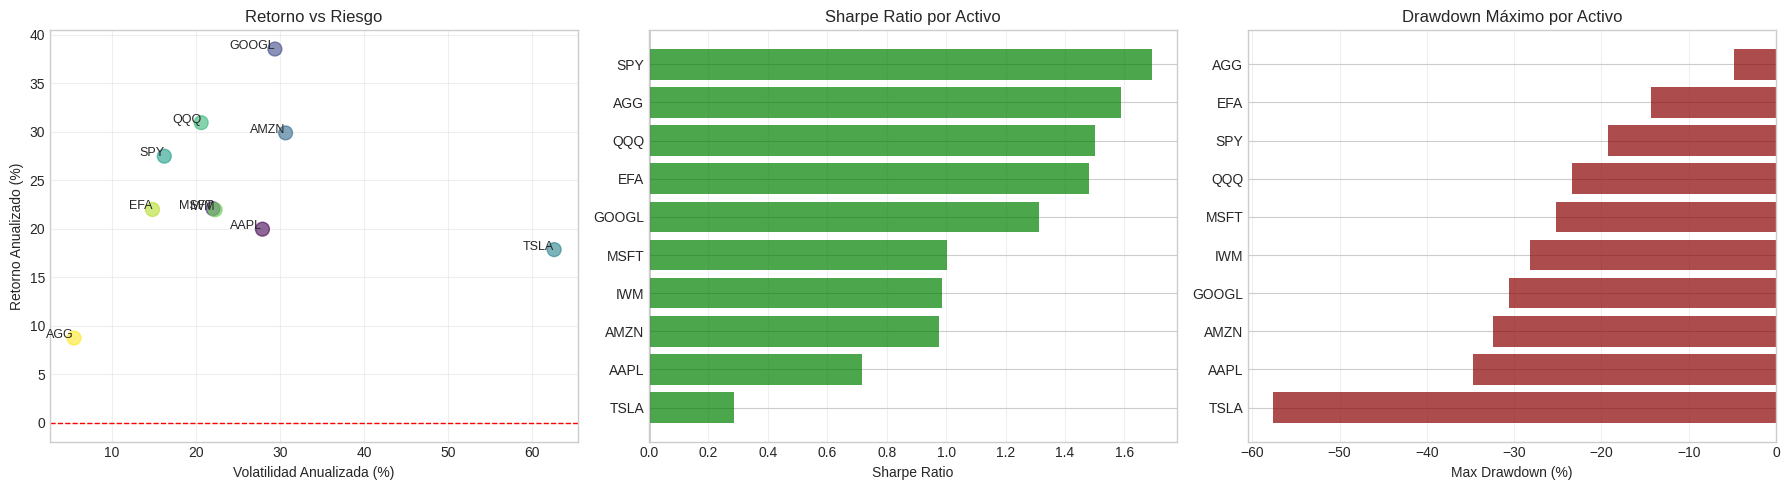

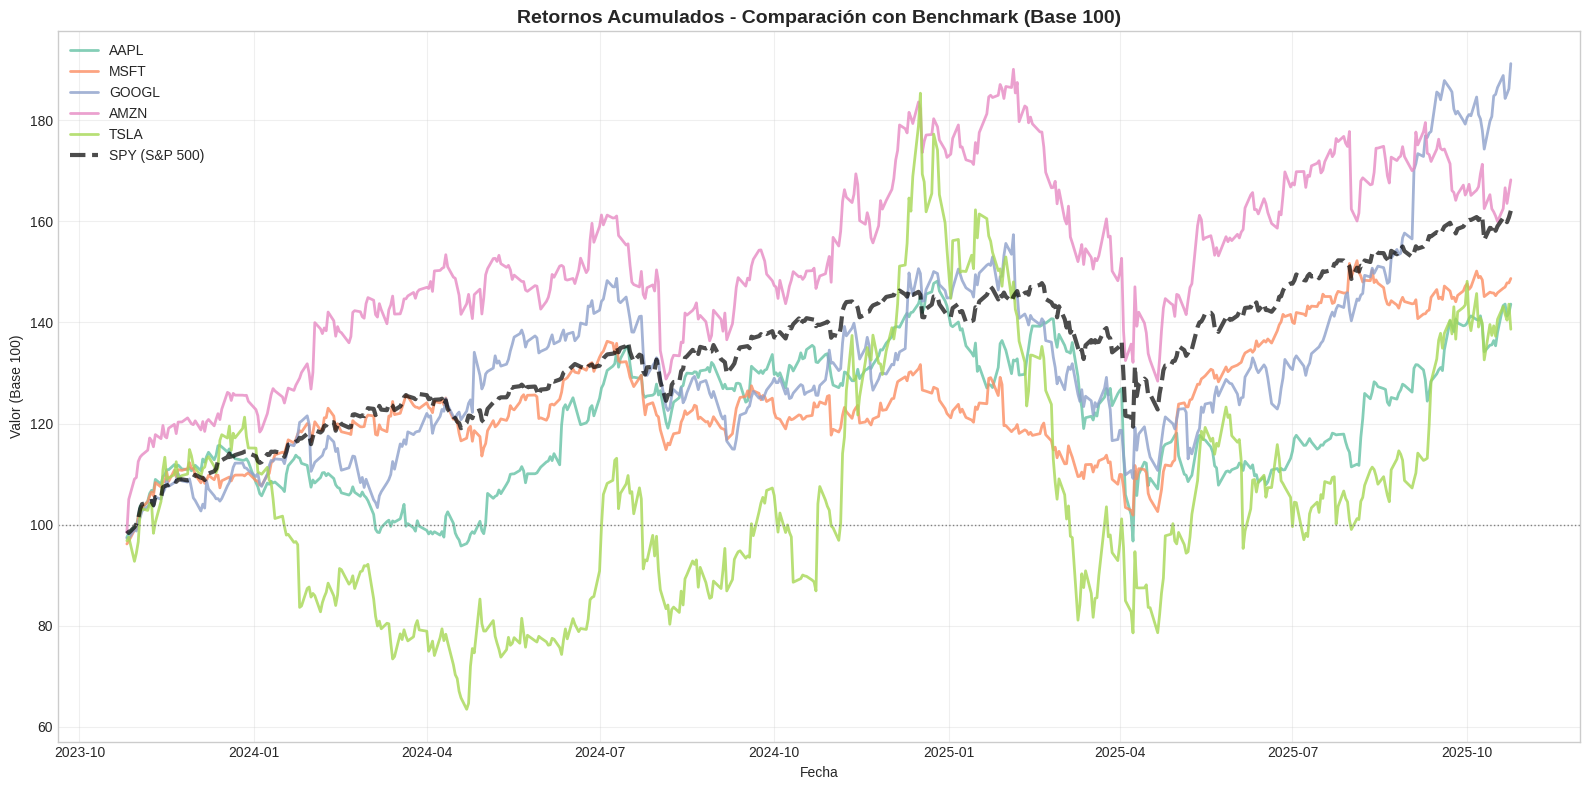


ANÁLISIS DE RIESGO: VaR Y CVaR

VaR y CVaR al 95% de confianza (Capital: $100,000):

                    AAPL     MSFT    GOOGL     AMZN     TSLA
VaR (%)            -2.74    -2.18    -2.69    -2.66    -5.63
CVaR (%)           -3.97    -3.17    -4.23    -4.26    -8.32
VaR ($100,000)  -2741.25 -2176.38 -2686.83 -2661.91 -5630.17
CVaR ($100,000) -3972.60 -3171.03 -4226.99 -4261.83 -8317.99

 INTERPRETACIÓN:
VaR 95%: Pérdida máxima esperada en el 95% de los días
CVaR 95%: Pérdida promedio cuando se supera el VaR (peor 5% de casos)

RESUMEN DE LA SESIÓN 2

CONCEPTOS CUBIERTOS:

1. ✓ Recolección de datos vía yfinance
2. ✓ Cálculo de retornos simples y logarítmicos
3. ✓ Estadísticas descriptivas financieras
4. ✓ Análisis de correlación entre activos
5. ✓ Hechos estilizados del mercado
6. ✓ Métricas de desempeño (Sharpe, Drawdown)
7. ✓ Value at Risk (VaR) y CVaR
8. ✓ Visualizaciones avanzadas

HABILIDADES ADQUIRIDAS:

- Descargar y procesar datos financieros
- Calcular y analizar retornos
- I

In [1]:
# ============================================================================
# SESIÓN 2: ANÁLISIS EXPLORATORIO Y ESTADÍSTICA FINANCIERA
# ============================================================================

# 1. INSTALACIÓN E IMPORTACIÓN DE LIBRERÍAS
# ============================================================================

!pip install yfinance alpha_vantage scipy statsmodels arch -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from scipy import stats # Import scipy.stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

# Configuración visual
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

print("Librerías importadas correctamente")

# ============================================================================
# 2. RECOLECCIÓN DE DATOS VÍA APIs
# ============================================================================

def descargar_datos_multiples(tickers, periodo="2y", intervalo="1d"):
    """
    Descarga datos históricos para múltiples tickers

    Parámetros:
    -----------
    tickers : list
        Lista de símbolos bursátiles
    periodo : str
        Periodo de tiempo ('1y', '2y', '5y', 'max')
    intervalo : str
        Intervalo de datos ('1d', '1wk', '1mo')

    Retorna:
    --------
    dict con DataFrames para cada ticker
    """
    datos = {}
    for ticker in tickers:
        try:
            df = yf.download(ticker, period=periodo, interval=intervalo, progress=False)
            if not df.empty:
                datos[ticker] = df
                print(f"✓ {ticker}: {len(df)} registros descargados")
            else:
                print(f"✗ {ticker}: Sin datos disponibles")
        except Exception as e:
            print(f"✗ {ticker}: Error - {e}")

    return datos

# Definir portafolio de análisis
tickers_acciones = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
tickers_etfs = ['SPY', 'QQQ', 'IWM', 'EFA', 'AGG']  # ETFs de mercado

print("\n" + "="*70)
print("DESCARGANDO DATOS HISTÓRICOS (2 AÑOS)")
print("="*70)

# Descargar datos
datos_acciones = descargar_datos_multiples(tickers_acciones, periodo="2y")
datos_etfs = descargar_datos_multiples(tickers_etfs, periodo="2y")

# Combinar todos los datos
todos_datos = {**datos_acciones, **datos_etfs}

# ============================================================================
# 3. CÁLCULO DE RETORNOS Y ESTADÍSTICAS BÁSICAS
# ============================================================================

def calcular_retornos(datos_dict):
    """
    Calcula retornos simples y logarítmicos para múltiples activos
    """
    retornos_simples = pd.DataFrame()
    retornos_log = pd.DataFrame()

    for ticker, df in datos_dict.items():
        # Retornos simples
        retornos_simples[ticker] = df['Close'].pct_change()

        # Retornos logarítmicos
        retornos_log[ticker] = np.log(df['Close'] / df['Close'].shift(1))

    return retornos_simples, retornos_log

print("\n" + "="*70)
print("CALCULANDO RETORNOS")
print("="*70)

retornos_simples, retornos_log = calcular_retornos(todos_datos)

# Eliminar valores NaN
retornos_simples = retornos_simples.dropna()
retornos_log = retornos_log.dropna()

print(f"\nRetornos calculados: {len(retornos_simples)} días de trading")
print(f"Periodo: {retornos_simples.index[0].date()} a {retornos_simples.index[-1].date()}")

# ============================================================================
# 4. ESTADÍSTICAS DESCRIPTIVAS COMPLETAS
# ============================================================================

def estadisticas_financieras(retornos):
    """
    Calcula estadísticas financieras completas
    """
    stats_df = pd.DataFrame({
        'Media Diaria (%)': retornos.mean() * 100,
        'Mediana (%)': retornos.median() * 100,
        'Desv. Estándar (%)': retornos.std() * 100,
        'Volatilidad Anual (%)': retornos.std() * np.sqrt(252) * 100,
        'Asimetría (Skewness)': retornos.skew(),
        'Curtosis (Kurtosis)': retornos.kurtosis(),
        'Mínimo (%)': retornos.min() * 100,
        'Máximo (%)': retornos.max() * 100,
        'VaR 95% (%)': retornos.quantile(0.05) * 100,
        'CVaR 95% (%)': retornos[retornos <= retornos.quantile(0.05)].mean() * 100
    })

    return stats_df

print("\n" + "="*70)
print("ESTADÍSTICAS DESCRIPTIVAS")
print("="*70)

stats_df = estadisticas_financieras(retornos_log) # Renamed variable to avoid conflict
print(stats_df.round(3))

# Interpretación de métricas clave
print("\n INTERPRETACIÓN:")
print("-" * 70)
for ticker in tickers_acciones[:3]:  # Primeras 3 acciones
    skew = stats_df.loc[ticker, 'Asimetría (Skewness)'] # Corrected variable name
    kurt = stats_df.loc[ticker, 'Curtosis (Kurtosis)'] # Corrected variable name

    print(f"\n{ticker}:")
    print(f"  • Asimetría: {skew:.2f} ({'Negativa (más caídas extremas)' if skew < 0 else 'Positiva (más subidas extremas)'})")
    print(f"  • Curtosis: {kurt:.2f} ({'Colas pesadas (más eventos extremos)' if kurt > 0 else 'Colas ligeras'})")

# ============================================================================
# 5. ANÁLISIS DE CORRELACIÓN
# ============================================================================

print("\n" + "="*70)
print("ANÁLISIS DE CORRELACIÓN")
print("="*70)

# Matriz de correlación
correlacion = retornos_log.corr()

# Visualización de matriz de correlación
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap completo
sns.heatmap(correlacion, annot=True, fmt='.2f', cmap='RdYlGn', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=axes[0])
axes[0].set_title('Matriz de Correlación - Todos los Activos', fontsize=14, fontweight='bold')

# Heatmap solo acciones
correlacion_acciones = retornos_log[tickers_acciones].corr()
sns.heatmap(correlacion_acciones, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=axes[1])
axes[1].set_title('Matriz de Correlación - Acciones Tech', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Pares con mayor y menor correlación
print("\n PARES CON MAYOR CORRELACIÓN:")
corr_pairs = correlacion.unstack()
corr_pairs = corr_pairs[corr_pairs < 1]  # Excluir diagonal
top_corr = corr_pairs.nlargest(5)
for pair, value in top_corr.items():
    print(f"  {pair[0]} - {pair[1]}: {value:.3f}")

print("\n PARES CON MENOR CORRELACIÓN:")
bottom_corr = corr_pairs.nsmallest(5)
for pair, value in bottom_corr.items():
    print(f"  {pair[0]} - {pair[1]}: {value:.3f}")

# ============================================================================
# 6. VISUALIZACIÓN DE DISTRIBUCIONES Y HECHOS ESTILIZADOS
# ============================================================================

print("\n" + "="*70)
print("ANÁLISIS DE HECHOS ESTILIZADOS")
print("="*70)

# Seleccionar un activo para análisis detallado
ticker_analisis = 'AAPL'
retornos_activo = retornos_log[ticker_analisis].dropna()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle(f'Hechos Estilizados del Mercado - {ticker_analisis}',
             fontsize=16, fontweight='bold')

# 1. Distribución de retornos vs Normal
axes[0, 0].hist(retornos_activo, bins=50, density=True, alpha=0.7,
                color='steelblue', edgecolor='black')

# Ajustar distribución normal
mu, sigma = retornos_activo.mean(), retornos_activo.std()
x = np.linspace(retornos_activo.min(), retornos_activo.max(), 100)
axes[0, 0].plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, # Corrected to use stats.norm.pdf
                label='Normal Teórica')
axes[0, 0].set_title('Hecho 1: Colas Pesadas (Fat Tails)')
axes[0, 0].set_xlabel('Retornos')
axes[0, 0].set_ylabel('Densidad')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Q-Q Plot (comparación con distribución normal)
stats.probplot(retornos_activo, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot: Desviación de Normalidad')
axes[0, 1].grid(True, alpha=0.3)

# 3. Volatilidad en el tiempo (agrupamiento)
volatilidad_movil = retornos_activo.rolling(window=20).std() * np.sqrt(252) * 100
axes[0, 2].plot(volatilidad_movil.index, volatilidad_movil, linewidth=1.5, color='orange')
axes[0, 2].fill_between(volatilidad_movil.index, volatilidad_movil, alpha=0.3, color='orange')
axes[0, 2].set_title('Hecho 2: Agrupamiento de Volatilidad')
axes[0, 2].set_xlabel('Fecha')
axes[0, 2].set_ylabel('Volatilidad Anualizada (%)')
axes[0, 2].grid(True, alpha=0.3)

# 4. Autocorrelación de retornos
plot_acf(retornos_activo, lags=40, ax=axes[1, 0], alpha=0.05)
axes[1, 0].set_title('Hecho 3: Ausencia de Autocorrelación en Retornos')
axes[1, 0].set_xlabel('Lag (días)')
axes[1, 0].set_ylabel('Autocorrelación')

# 5. Autocorrelación de retornos al cuadrado (proxy de volatilidad)
plot_acf(retornos_activo**2, lags=40, ax=axes[1, 1], alpha=0.05)
axes[1, 1].set_title('Hecho 4: Autocorrelación en Volatilidad')
axes[1, 1].set_xlabel('Lag (días)')
axes[1, 1].set_ylabel('Autocorrelación')

# 6. Efecto apalancamiento
retornos_positivos = retornos_activo[retornos_activo > 0]
retornos_negativos = retornos_activo[retornos_activo < 0]

axes[1, 2].hist(retornos_positivos, bins=30, alpha=0.6, color='green',
                label=f'Positivos (σ={retornos_positivos.std():.4f})')
axes[1, 2].hist(retornos_negativos, bins=30, alpha=0.6, color='red',
                label=f'Negativos (σ={retornos_negativos.std():.4f})')
axes[1, 2].set_title('Hecho 5: Efecto Apalancamiento')
axes[1, 2].set_xlabel('Retornos')
axes[1, 2].set_ylabel('Frecuencia')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Test de normalidad (Jarque-Bera)
jb_stat, jb_pvalue = stats.jarque_bera(retornos_activo)
print(f"\n Test de Jarque-Bera para {ticker_analisis}:")
print(f"  Estadístico: {jb_stat:.2f}")
print(f"  P-valor: {jb_pvalue:.6f}")
print(f"  Conclusión: {'Rechazamos normalidad' if jb_pvalue < 0.05 else 'No rechazamos normalidad'} (α=0.05)")

# ============================================================================
# 7. ANÁLISIS DE DESEMPEÑO COMPARATIVO
# ============================================================================

print("\n" + "="*70)
print("ANÁLISIS DE DESEMPEÑO")
print("="*70)

def metricas_desempeno(retornos, nombre_activo):
    """
    Calcula métricas de desempeño financiero
    """
    # Retorno acumulado
    retorno_acumulado = (1 + retornos).prod() - 1

    # Retorno anualizado
    dias_trading = len(retornos)
    anos = dias_trading / 252
    retorno_anualizado = (1 + retorno_acumulado) ** (1/anos) - 1

    # Volatilidad anualizada
    volatilidad = retornos.std() * np.sqrt(252)

    # Sharpe Ratio (asumiendo rf = 0 para simplificar)
    sharpe = retorno_anualizado / volatilidad if volatilidad != 0 else 0

    # Drawdown máximo
    retornos_acum = (1 + retornos).cumprod()
    running_max = retornos_acum.cummax()
    drawdown = (retornos_acum - running_max) / running_max
    max_drawdown = drawdown.min()

    # Ratio Calmar
    calmar = retorno_anualizado / abs(max_drawdown) if max_drawdown != 0 else 0

    return {
        'Activo': nombre_activo,
        'Retorno Acumulado (%)': retorno_acumulado * 100,
        'Retorno Anualizado (%)': retorno_anualizado * 100,
        'Volatilidad Anual (%)': volatilidad * 100,
        'Sharpe Ratio': sharpe,
        'Max Drawdown (%)': max_drawdown * 100,
        'Ratio Calmar': calmar
    }

# Calcular métricas para todos los activos
metricas_lista = []
for ticker in retornos_log.columns:
    metricas = metricas_desempeno(retornos_log[ticker].dropna(), ticker)
    metricas_lista.append(metricas)

df_metricas = pd.DataFrame(metricas_lista).set_index('Activo')
print(df_metricas.round(2))

# Visualización de métricas clave
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Retorno vs Volatilidad
axes[0].scatter(df_metricas['Volatilidad Anual (%)'],
                df_metricas['Retorno Anualizado (%)'],
                s=100, alpha=0.6, c=range(len(df_metricas)), cmap='viridis')

for idx, ticker in enumerate(df_metricas.index):
    axes[0].annotate(ticker,
                     (df_metricas.loc[ticker, 'Volatilidad Anual (%)'],
                      df_metricas.loc[ticker, 'Retorno Anualizado (%)']),
                     fontsize=9, ha='right')

axes[0].set_xlabel('Volatilidad Anualizada (%)')
axes[0].set_ylabel('Retorno Anualizado (%)')
axes[0].set_title('Retorno vs Riesgo')
axes[0].grid(True, alpha=0.3)
axes[0].axhline(0, color='red', linestyle='--', linewidth=1)

# Sharpe Ratio
df_metricas_sorted = df_metricas.sort_values('Sharpe Ratio', ascending=True)
colors = ['green' if x > 0 else 'red' for x in df_metricas_sorted['Sharpe Ratio']]
axes[1].barh(df_metricas_sorted.index, df_metricas_sorted['Sharpe Ratio'], color=colors, alpha=0.7)
axes[1].set_xlabel('Sharpe Ratio')
axes[1].set_title('Sharpe Ratio por Activo')
axes[1].axvline(0, color='black', linewidth=1)
axes[1].grid(True, alpha=0.3, axis='x')

# Max Drawdown
df_metricas_sorted_dd = df_metricas.sort_values('Max Drawdown (%)', ascending=True)
axes[2].barh(df_metricas_sorted_dd.index, df_metricas_sorted_dd['Max Drawdown (%)'],
             color='darkred', alpha=0.7)
axes[2].set_xlabel('Max Drawdown (%)')
axes[2].set_title('Drawdown Máximo por Activo')
axes[2].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# ============================================================================
# 8. ANÁLISIS DE RETORNOS ACUMULADOS
# ============================================================================

# Calcular retornos acumulados (base 100)
retornos_acumulados = (1 + retornos_log).cumprod() * 100

plt.figure(figsize=(16, 8))

# Graficar acciones
for ticker in tickers_acciones:
    plt.plot(retornos_acumulados.index, retornos_acumulados[ticker],
             linewidth=2, label=ticker, alpha=0.8)

# Graficar benchmark (SPY)
plt.plot(retornos_acumulados.index, retornos_acumulados['SPY'],
         linewidth=3, label='SPY (S&P 500)', color='black', linestyle='--', alpha=0.7)

plt.title('Retornos Acumulados - Comparación con Benchmark (Base 100)',
          fontsize=14, fontweight='bold')
plt.xlabel('Fecha')
plt.ylabel('Valor (Base 100)')
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.axhline(100, color='gray', linestyle=':', linewidth=1)
plt.tight_layout()
plt.show()

# ============================================================================
# 9. VALUE AT RISK (VaR) Y CONDITIONAL VaR
# ============================================================================

print("\n" + "="*70)
print("ANÁLISIS DE RIESGO: VaR Y CVaR")
print("="*70)

def calcular_var_cvar(retornos, nivel_confianza=0.95, capital=100000):
    """
    Calcula Value at Risk y Conditional VaR
    """
    alpha = 1 - nivel_confianza

    # VaR histórico
    var_historico = retornos.quantile(alpha)

    # CVaR (Expected Shortfall)
    cvar = retornos[retornos <= var_historico].mean()

    # En términos monetarios
    var_monetario = var_historico * capital
    cvar_monetario = cvar * capital

    return {
        'VaR (%)': var_historico * 100,
        'CVaR (%)': cvar * 100,
        f'VaR (${capital:,})': var_monetario,
        f'CVaR (${capital:,})': cvar_monetario
    }

# Calcular VaR y CVaR para cada activo
print(f"\nVaR y CVaR al 95% de confianza (Capital: $100,000):\n")

var_cvar_df = pd.DataFrame()
for ticker in retornos_log.columns[:5]:  # Primeros 5 activos
    metricas_riesgo = calcular_var_cvar(retornos_log[ticker].dropna())
    var_cvar_df[ticker] = metricas_riesgo

print(var_cvar_df.round(2))

print("\n INTERPRETACIÓN:")
print("VaR 95%: Pérdida máxima esperada en el 95% de los días")
print("CVaR 95%: Pérdida promedio cuando se supera el VaR (peor 5% de casos)")

# ============================================================================
# 10. RESUMEN Y CONCLUSIONES
# ============================================================================

print("\n" + "="*70)
print("RESUMEN DE LA SESIÓN 2")
print("="*70)

print("""
CONCEPTOS CUBIERTOS:

1. ✓ Recolección de datos vía yfinance
2. ✓ Cálculo de retornos simples y logarítmicos
3. ✓ Estadísticas descriptivas financieras
4. ✓ Análisis de correlación entre activos
5. ✓ Hechos estilizados del mercado
6. ✓ Métricas de desempeño (Sharpe, Drawdown)
7. ✓ Value at Risk (VaR) y CVaR
8. ✓ Visualizaciones avanzadas

HABILIDADES ADQUIRIDAS:

- Descargar y procesar datos financieros
- Calcular y analizar retornos
- Identificar patrones estadísticos en mercados
- Evaluar riesgo y desempeño de activos
- Comparar activos con benchmarks
""")